In [21]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets


import pickle

name_data_file = 'newExtrapolated_allCorrection.pickle'

with open(name_data_file, "rb") as input_file:
    data = pickle.load(input_file)

data.keys()

dict_keys(['gams', 'kinCube', 'geoCUBE', 'potCube', 'dipCUBE', 'smoCube', 'thes', 'phis'])

In [22]:
from quantumpropagator import fromLabelsToFloats, labTranformA

phis_ext = labTranformA(data['phis'])
gams_ext = labTranformA(data['gams'])
thes_ext = labTranformA(data['thes'])

phiV_ext, gamV_ext, theV_ext = fromLabelsToFloats(data)

# take step
dphi = phis_ext[0] - phis_ext[1]
dgam = gams_ext[0] - gams_ext[1]
dthe = thes_ext[0] - thes_ext[1]

# take range
range_phi = phis_ext[-1] - phis_ext[0]
range_gam = gams_ext[-1] - gams_ext[0]
range_the = thes_ext[-1] - thes_ext[0]


header = '         Labels extr.        internal extr.     dq      range\n'
string = 'Phi -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nGam -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nThe -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'
out = (header + string).format(phiV_ext[-1],phiV_ext[0],phis_ext[-1],phis_ext[0],dphi,range_phi,
                               gamV_ext[-1],gamV_ext[0],gams_ext[-1],gams_ext[0],dgam,range_gam,
                               theV_ext[-1],theV_ext[0],thes_ext[-1],thes_ext[0],dthe,range_the)
print(out)

         Labels extr.        internal extr.     dq      range
Phi ->   0.1250  -0.1450  12.5000 -14.5000  -0.5000  27.0000
Gam ->   0.4294   0.1344  24.6050   7.7030  -0.3070  16.9020
The ->   0.5806   1.2008  66.5340 137.6000   0.4470 -71.0660


# Title
we will try to cut the 3d potential in 1.

In [23]:
potential = data['potCube']
ground = potential[:,:,:,0]
zero_g = ground - np.amin(ground)
# find the minimum
p_min,g_min,t_min = np.unravel_index(zero_g.argmin(), zero_g.shape)


In [24]:
# The three potentials are
p_linear_pot = zero_g[:,g_min,t_min]
g_linear_pot = zero_g[p_min,:,t_min]
t_linear_pot = zero_g[p_min,g_min,:]


In [25]:
p_linear_pot = p_linear_pot

<IPython.core.display.Javascript object>


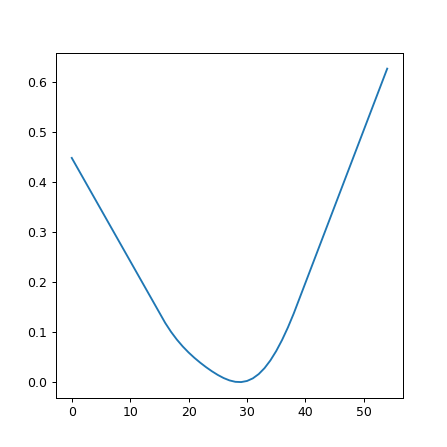

In [26]:
fig = plt.figure(figsize=(5,5))
plt.plot(p_linear_pot);
# plt.plot(g_linear_pot)
# plt.plot(t_linear_pot)


This is along phi. I take the G element of the kin matrix corresponding to the second derivative.

In [27]:
#
kin = data['kinCube']
p_linear_kin = kin[:,g_min,t_min]
p_linear_mu = p_linear_kin[:,0,2]

#
p_delta = -0.005
g_delta = -0.00535816080362
t_delta = 0.00390081087821

In [28]:
# 52 here is [len(phis)-3] -> [55-3] because I insert 3 numbers into the toeplitz matrix

from scipy.linalg import toeplitz
p_matrix = toeplitz([-(5/2), (4/3), -(1/12), *np.zeros(52)])

In [29]:
np.set_printoptions(linewidth=250, edgeitems=5)

In [30]:
p_matrix_divided = p_matrix/(dphi**2)
p_matrix_divided

array([[-10.        ,   5.33333333,  -0.33333333,   0.        ,   0.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  5.33333333, -10.        ,   5.33333333,  -0.33333333,   0.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [ -0.33333333,   5.33333333, -10.        ,   5.33333333,  -0.33333333, ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.33333333,   5.33333333, -10.        ,   5.33333333, ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  -0.33333333,   5.33333333, -10.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        , ..., -10.        ,   5.33333333,  -0.33333333,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,

In [31]:
# linear mu saved in kin matrix is already 1/mass... this is why here I multiply instead of dividing

new = (p_matrix_divided*p_linear_mu)

# column or rows?

It should be rows -> same value of mu across the same row

In [32]:
new

array([[  8.35513655e-07,  -4.45607283e-07,   2.78504552e-08,  -0.00000000e+00,  -0.00000000e+00, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07,   2.78504552e-08,  -0.00000000e+00, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  2.78504552e-08,  -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07,   2.78504552e-08, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   8.35513655e-07, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       ..., 
       [ -0.00000

In [33]:
p_linear_pot_diagonal = np.diag(p_linear_pot)

In [34]:
to_diagonalize = p_linear_pot_diagonal + new

In [35]:
eigVal,eigVec = np.linalg.eig(to_diagonalize)

In [36]:
index_min = np.unravel_index(eigVal.argmin(), eigVal.shape) 
eigVal,index_min, eigVal[index_min]

(array([  4.48833322e-01,   4.28182474e-01,   4.07531626e-01,   3.86880778e-01,   3.66229930e-01,   3.45579082e-01,   3.24928234e-01,   3.04277386e-01,   2.83626538e-01,   2.62975690e-01,   2.42324842e-01,   2.21673993e-01,   2.01023145e-01,
          1.80372297e-01,   1.59721449e-01,   1.39070601e-01,   1.18409605e-01,   1.00545333e-01,   8.49590014e-02,   7.13061999e-02,   5.92620681e-02,   4.85011648e-02,   3.87395035e-02,   2.97898959e-02,   2.16036747e-02,   1.42861019e-02,
          8.08467077e-03,   3.35571278e-03,   5.17712406e-04,   8.35038960e-07,   2.20194569e-03,   7.44885313e-03,   1.59782033e-02,   2.79261778e-02,   4.33291654e-02,   6.21313910e-02,   8.41974925e-02,   1.09331832e-01,   1.37316079e-01,
          1.67984338e-01,   1.98622045e-01,   2.29259752e-01,   2.59897459e-01,   2.90535166e-01,   3.21172874e-01,   3.51810581e-01,   3.82448288e-01,   4.13085995e-01,   4.43723702e-01,   4.74361409e-01,   5.04999117e-01,   5.35636824e-01,
          5.66274531e-01,   5.96

In [37]:
eigVec

array([[  1.00000000e+000,  -2.15781881e-005,  -6.74084660e-007,   1.45488616e-011,   2.27195053e-013, ...,   3.04973364e-159,   7.69196385e-163,   1.12270064e-166,   6.13370278e-170,   1.55380269e-171],
       [ -2.15781735e-005,  -1.00000000e+000,   2.15781735e-005,   6.74084660e-007,  -1.45488516e-011, ...,  -3.36417697e-152,  -1.32920801e-155,   3.87599337e-159,   8.88660193e-161,   2.11963186e-162],
       [  6.74550277e-007,   2.15781444e-005,   1.00000000e+000,  -2.15781736e-005,  -6.74084660e-007, ...,  -5.27658170e-151,  -2.08065315e-154,   1.44561457e-157,   1.43619506e-159,   3.39974343e-161],
       [ -1.45522123e-011,  -6.74550277e-007,  -2.15781444e-005,  -1.00000000e+000,   2.15781735e-005, ...,   1.75716785e-145,   6.95360290e-149,  -6.01256893e-152,  -4.91195750e-154,  -1.16002715e-155],
       [  2.27509023e-013,   1.45522036e-011,   6.74550277e-007,   2.15781444e-005,   1.00000000e+000, ...,   5.17143763e-144,   2.04863833e-147,  -2.17257070e-150,  -1.47327732e-152, 

In [38]:
p_gaussian = eigVec[index_min]
p_gaussian, np.linalg.norm(p_gaussian)

(array([  6.22394437e-88,   1.02976069e-82,  -6.31298727e-80,  -1.28644182e-74,   2.72161041e-73,   3.63843105e-68,  -5.59490963e-66,  -1.40996688e-62,   7.87802696e-61,   5.15780883e-58,   1.07860934e-55,   2.16419832e-51,  -3.90356818e-49,
         -8.22470498e-47,   1.43410331e-45,   3.83672823e-41,  -2.98721269e-42,   4.58695312e-38,  -8.17862183e-35,  -6.50903910e-32,  -1.49649867e-29,  -4.30570093e-25,  -7.46611743e-23,  -1.77461608e-18,   2.40981068e-16,   4.98035180e-12,
          5.27829357e-10,   8.32233868e-06,  -8.62091680e-04,   9.99999608e-01,  -2.02448884e-04,  -3.74439228e-06,  -1.47497690e-10,  -1.35824580e-12,  -2.96650482e-17,  -1.86135181e-19,  -2.88299395e-24,  -1.40755329e-26,  -1.76001850e-31,
         -7.15517066e-34,  -8.84228646e-39,  -3.71685302e-41,  -4.94834575e-46,  -1.94014127e-48,  -2.78653698e-53,  -9.57908614e-56,  -1.88618953e-58,   9.92600341e-61,  -7.47179392e-62,  -1.67993598e-65,   1.40772735e-65,   2.07417426e-68,
          7.69222318e-70,   3.91

<IPython.core.display.Javascript object>


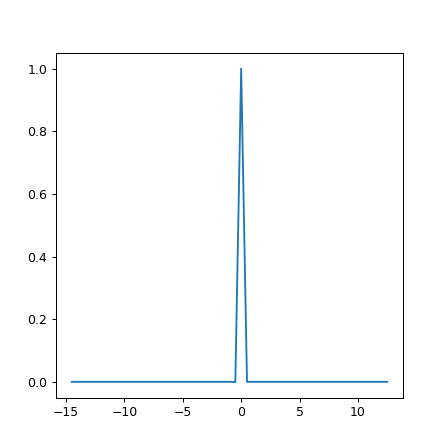

In [39]:
fig = plt.figure(figsize=(5,5))
plt.plot(phis_ext,p_gaussian);